In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sympy import *

In [7]:
x = Symbol("x")

In [8]:
def lagranz(x,y,t):
         z=0
         for j in range(len(y)):
             p1=1; p2=1
             for i in range(len(x)):
                 if i==j:
                     p1=p1*1; p2=p2*1   
                 else: 
                     p1=p1*(t-x[i])
                     p2=p2*(x[j]-x[i])
             z=z+y[j]*p1/p2
         return z

In [9]:
def newton(x, y, t):
    value = 0
    norm = 1
    for i in range(len(y)):
        for j in range(i):
            norm *= (t - x[j])
        value += (coef(x, y, i) * norm)
        norm = 1
    return value

def coef(x, y, n):
    denom = 1
    num = y[n]
    norm = 1
    
    if(n == 0):
        return num
    
    for i in range(n):
        for j in range(i):
            norm *= (x[n] - x[j])
        denom *= (x[n]-x[i])
        num -= (coef(x, y, i) * norm)
        norm = 1
    
    return (num/denom)

In [10]:
def difference(X, K, t):
    omega = 1
    for i in X:
        omega *= (t - i)
    return K*abs(omega)

In [11]:
def chebNode(a, b, n):
    return [(0.5)*(b+a)+(0.5)*(b-a)*np.cos(((2*k+1)*(np.pi))/(2*(n+1))) for k in range(n)]

In [12]:
def FLPlot(n):
    X = np.linspace(-1, 2, n)
    Y = [np.exp(i) for i in X]
    
    newX = np.linspace(np.min(X), np.max(X), 100)
    newY = [lagranz(X, Y, i) for i in newX]
    
    #----ПОГРЕШНОСТЬ-----------
    M = 0
    for i in newX:
        mid = abs(diff(exp(x), x, (n+1)).subs(x, i))
        if(M < mid): M = mid
    K = M/factorial(n+1)
    
    diffY = [difference(X, K, i) for i in newX]
    real_diffY = [abs(np.exp(i)-lagranz(X, Y, i)) for i in newX]
    
    #----ОТРИСОВКА-ГРАФИКОВ-----------
    plt.plot(newX, np.exp(newX), "blue", label = "exp(x)") 
    plt.plot(newX, newY, "red", label = "L(x)")
    plt.plot(X, Y, "o", label = "data")
    plt.grid(True)
    plt.axis([-1, 2, 0, 10])
    plt.legend()
    plt.show()
    
    plt.plot(newX, diffY, "blue", label = "~diff") 
    plt.plot(newX, real_diffY, "red", label = "real diff")
    plt.grid(True)
    plt.axis([-1, 2, 0, 10])
    plt.legend()
    plt.show()

In [13]:
def FNPlot(n):
    X = np.linspace(-1, 2, n)
    Y = [np.exp(i) for i in X]
    
    newX = np.linspace(np.min(X), np.max(X), 100)
    newY = [newton(X, Y, i) for i in newX]
    
    plt.plot(newX, np.exp(newX), "blue", label = "exp(x)")
    plt.plot(newX, newY, "green", label = "N(x)")
    plt.plot(X, Y, "o", label = "data")
    plt.grid(True)
    plt.axis([-1, 2, 0, 10])
    plt.legend()
    plt.show()

In [21]:
def chebLPlot(n):
    X = chebNode(-1, 2, n)
    Y = [np.exp(i) for i in X]
    
    newX = np.linspace(-1, 2, 100)
    newY = [lagranz(X, Y, i) for i in newX]
    
    #----ПОГРЕШНОСТЬ-----------
    M = 0
    for i in newX:
        mid = abs(diff(exp(x), x, (n+1)).subs(x, i))
        if(M < mid): M = mid
    K = M/factorial(n+1)
    
    diffY = [difference(X, K, i) for i in newX]
    real_diffY = [abs(np.exp(i)-lagranz(X, Y, i)) for i in newX]
    
    #----ОТРИСОВКА-ГРАФИКОВ-----------
    plt.plot(newX, np.exp(newX), "blue", label = "exp(x)") 
    plt.plot(newX, newY, "red", label = "L(x)")
    plt.plot(X, Y, "o", label = "data")
    plt.grid(True)
    plt.axis([-1, 2, 0, 10])
    plt.legend()
    plt.show()
    
    plt.plot(newX, diffY, "blue", label = "~diff") 
    plt.plot(newX, real_diffY, "red", label = "real diff")
    plt.grid(True)
    plt.axis([-1, 2, 0, 10])
    plt.legend()
    plt.show()

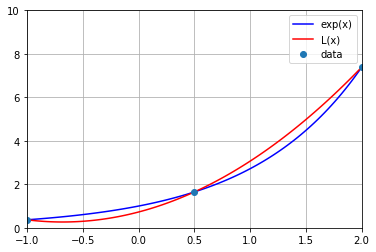

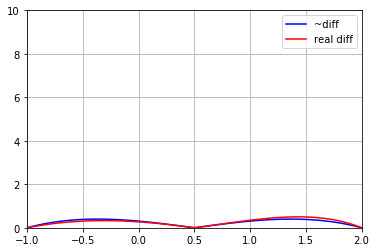

In [15]:
FLPlot(3)

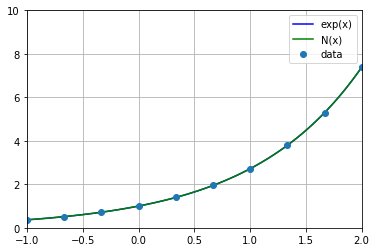

In [16]:
FNPlot(10)

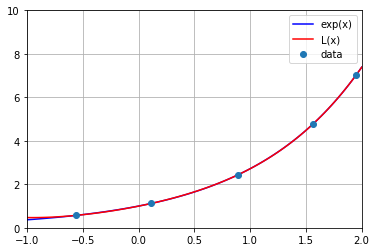

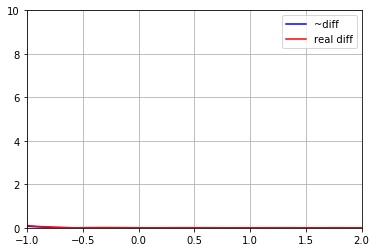

In [26]:
chebLPlot(5)

In [20]:
chebNode(-1, 2, 5)

[1.9488887394336025,
 1.5606601717798214,
 0.88822856765378111,
 0.11177143234621906,
 -0.56066017177982119]